### ***Aggregate Transit Trip Table***

In [1]:
# import pandas as pd
# from datetime import datetime

# def convert_to_seconds(time_str):

#         time_part = time_str.split(' ')[1]
#         hours, minutes, seconds = map(int, time_part.split(':'))
#         total_seconds = hours * 3600 + minutes * 60 + seconds
#         return total_seconds
    
# trip_tables_pre = pd.read_csv('outputs/TripTablePre_GTFS_freq_0.5_speed_0.5.csv')

# trip_tables_pre['departure_time'] = trip_tables_pre['departure_time'].apply(convert_to_seconds)
# summary = trip_tables_pre.groupby(['agency', 'route_id', 'trip_headsign']).agg(
#         route_type=('route_mode', 'first'),  
#         route_name=('route_name', 'first'), 
#         route_long_name=('route_long_name', 'first'), 
#         min_departure_time_seconds=('departure_time', 'min'),  
#         max_departure_time_seconds=('departure_time', 'max'),
#         num_trips=('trip_id', 'nunique'),
#         total_vmt_meters=('lenght', 'sum'),  
#         total_vht_seconds=('duration', 'sum')  
#         ).reset_index()
# summary['total_vmt_per_trip_meters'] = summary['total_vmt_meters']/summary['num_trips']
# summary['total_vht_per_trip_seconds'] = summary['total_vht_seconds']/summary['num_trips']
# summary['avg_speed_km_per_h'] = summary['total_vmt_meters'] / summary['total_vht_seconds'] * 3.6
# summary['frequency_seconds'] = (summary['max_departure_time_seconds']-summary['min_departure_time_seconds'])/summary['num_trips']

# trip_tables = pd.read_csv('outputs/TripTable_GTFS_freq_0.5_speed_0.5.csv')
# trip_tables['departure_time'] = trip_tables['departure_time'].apply(convert_to_seconds)
# summary2 = trip_tables.groupby(['agency', 'route_id', 'trip_headsign']).agg(
#         route_type=('route_mode', 'first'),  
#         route_name=('route_name', 'first'), 
#         route_long_name=('route_long_name', 'first'), 
#         min_departure_time_seconds=('departure_time', 'min'),  
#         max_departure_time_seconds=('departure_time', 'max'),
#         num_trips=('trip_id', 'nunique'),
#         total_vmt_meters=('lenght', 'sum'),  
#         total_vht_seconds=('duration', 'sum')  
#         ).reset_index()
# summary2['total_vmt_per_trip_meters'] = summary2['total_vmt_meters']/summary2['num_trips']
# summary2['total_vht_per_trip_seconds'] = summary['total_vht_seconds']/summary2['num_trips']
# summary2['avg_speed_km_per_h'] = summary2['total_vmt_meters'] / summary2['total_vht_seconds'] * 3.6
# summary2['frequency_seconds'] = (summary2['max_departure_time_seconds']-summary2['min_departure_time_seconds'])/summary['num_trips']

# summary_final = pd.merge(summary, summary2, 
#                          on=['agency', 'route_id', 'trip_headsign'], 
#                          suffixes=('_pre', '_post'))

# #Fai vedere la varianza dei Dep times, lengths durations and speeds


# summary_final['frequency_factor'] = summary_final['frequency_seconds_post'] / summary_final['frequency_seconds_pre']
# summary_final['speed_factor'] = summary_final['avg_speed_km_per_h_post'] / summary_final['avg_speed_km_per_h_pre']

# summary_final.to_csv('outputs/transit_trips_aggregate_ST.csv', index=False)


# print("Summary table created successfully.")


In [2]:
agency_name_dict = {
    'AC': 'AC: Alameda-Contra Costa Transit (AC Transit)',
    'AM': 'AM: Capitol Corridor',    
    'AY': 'AY: American Canyon Transit (ACT)',
    'BA': 'BA: Bay Area Rapid Transit (BART)',
    'CC': 'CC: County Connection',
    'CE': 'CE: Altamont Corridor Express (ACE)',
    'CM': 'CM: San Mateo Commute.org Shuttles',
    'DE': 'DE: Dumbarton Express',
    'EM': 'EM: Emery Go-Round',
    'FF': 'FF: Fairfield and Suisun Transit (FAST)',
    'GG': 'GG: Golden Gate Transit',
    'HF': 'HF: Alcatraz Hornblower Ferry',
    'MA': 'MA: Marin Transit',
    'SB': 'SB: San Francisco Bay Ferry',
    'SC': 'SC: Santa Cruz Metro',
    'SF': 'SF: San Francisco Municipal Transportation Agency (SFMTA)',
    'SL': 'SL: SolTrans',
    'SM': 'SM: Stanford Marguerite Shuttle',
    'SO': 'SO: Sonoma County Transit',
    'SR': 'SR: Santa Rosa CityBus',
    'ST': 'ST: SamTrans',
    'TD': 'TD: Tri Delta Transit',
    'VC': 'VC: Vacaville City Coach',
    'VN': 'VN: Vine Transit (Napa County)',
    'VT': 'VT: Santa Clara Valley Transportation Authority (VTA)',
    'WH': 'WH: Livermore Amador Valley Transit Authority (LAVTA)',
    'Ca': 'CA: Caltrain',
    'PE': 'PE: Petaluma Transit',
    'RV': 'RV: Rio Vista Delta Breeze',
    'UC': 'UC: Union City Transit',
    'WC': 'WC: Western Contra Costa Transit Authority (WestCAT)'
        }
mode_type_dict = {0: 'Tram',
                  1: 'Subway',
                  2: 'Train',
                  3: 'Bus',
                  4: 'Ferry',
                  5: 'Cable Car',
                    }

# ****Supply Table****

In [47]:
import pandas as pd
from datetime import datetime

def convert_to_seconds(time_str):
    """
    Convert a time string in 'YYYY-MM-DD HH:MM:SS' format to seconds.
    """
    time_part = time_str.split(' ')[1]
    hours, minutes, seconds = map(int, time_part.split(':'))
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds


def process_trip_data(file_path):
    """
    Process trip data from a CSV file.
    """
    trip_tables = pd.read_csv(file_path)
    trip_tables['departure_time'] = trip_tables['departure_time'].apply(convert_to_seconds)
    trip_tables['agency'] = trip_tables['agency'].fillna('')
    trip_tables['route_mode'] = trip_tables['route_mode'].fillna('')
    grouped = trip_tables.groupby(['agency','route_mode'])

    summary = grouped.agg(

        min_departure_time_seconds=('departure_time', 'min'),
        max_departure_time_seconds=('departure_time', 'max'),
        num_routes=('route_id', 'nunique'),
        num_dir=('trip_headsign', 'nunique'),
        num_trips=('trip_id', 'nunique'),
        total_vmt_meters=('lenght', 'sum'),
        total_vht_seconds=('duration', 'sum'),
    ).reset_index()
    


    summary['avg_speed_km_per_h'] = (summary['total_vmt_meters'] / summary['total_vht_seconds'] * 3.6).astype(float).round(1)
    summary['frequency_hour'] = (3600 / (summary['max_departure_time_seconds'] - summary['min_departure_time_seconds']) * summary['num_trips']).astype(int)

    return summary

# Processing pre-change trip data
summary_pre = process_trip_data('outputs/TripTablePre_GTFS_freq_1.5_speed_1.5.csv')
      


null_headsign_dict = {0:1}
summary_pre['num_dir'] = summary_pre['num_dir'].apply(lambda x: null_headsign_dict[x] if x in null_headsign_dict and null_headsign_dict[x] != x else x)

summary_pre['route_mode'] = summary_pre['route_mode'].map(mode_type_dict)
# summary_pre['agency'] = summary_pre['agency'].map(agency_name_dict)
summary_pre = summary_pre.sort_values(by='num_trips', ascending=False)

summary_pre['VKT [km]'] = (summary_pre['total_vmt_meters']/1000).astype(int)
summary_pre.drop(columns=['total_vmt_meters'], inplace=True)

summary_pre['VHT [h]'] = (summary_pre['total_vht_seconds']/3600).astype(int)
summary_pre.drop(columns=['total_vht_seconds'], inplace=True)

# summary_pre.rename(columns={'avg_time_diff': 'AV Headway [min]'}, inplace=True)
# summary_pre.rename(columns={'std_time_diff': 'STD Headway [min]'}, inplace=True)
# summary_pre['AV Headway [min]'] = (summary_pre['AV Headway [min]']/60).astype(int)
# summary_pre['STD Headway [min]'] = (summary_pre['STD Headway [min]']/60).astype(int)
summary_pre.rename(columns={'num_routes': 'N Routes'}, inplace=True)
summary_pre.rename(columns={'num_dir': 'N Headsigns'}, inplace=True)
summary_pre.rename(columns={'min_departure_time_seconds': 'Min Depart Hour'}, inplace=True)
summary_pre.rename(columns={'max_departure_time_seconds': 'Max Depart Hour'}, inplace=True)
summary_pre['Min Depart Hour'] = (summary_pre['Min Depart Hour']/3600).astype(int)
summary_pre['Max Depart Hour'] = (summary_pre['Max Depart Hour']/3600).astype(int)

summary_pre.rename(columns={'num_trips': 'N Trips'}, inplace=True)
summary_pre['AV Headway [min]'] = ((summary_pre['Max Depart Hour']-summary_pre['Min Depart Hour']+1)/(summary_pre['N Trips']/summary_pre['N Headsigns'])*60).astype(int)



summary_pre['VKT per trip [km]'] = (summary_pre['VKT [km]'] / summary_pre['N Trips']).astype(int)
summary_pre['VHT per trip [min]'] = (summary_pre['VHT [h]'] * 60 / summary_pre['N Trips']).astype(int)

summary_pre.rename(columns={'avg_speed_km_per_h': 'AV Speed [km/h]'}, inplace=True)
summary_pre.rename(columns={'frequency_hour': 'Trips per Hour [1/h]'}, inplace=True)
summary_pre.rename(columns={'agency': 'Agency'}, inplace=True)
summary_pre.rename(columns={'route_mode': 'Mode'}, inplace=True)




summary_pre

,Agency,Mode,Min Depart Hour,Max Depart Hour,N Routes,N Headsigns,N Trips,AV Speed [km/h],Trips per Hour [1/h],VKT [km],VHT [h],AV Headway [min],VKT per trip [km],VHT per trip [min]
19,SF,Bus,5,23,65,108,8889,14.3,473,93335,6546,13,10,44
0,AC,Bus,5,23,152,161,6527,21.3,349,102453,4820,28,15,44
17,SC,Bus,5,23,54,52,5006,28.7,273,134248,4682,11,26,56
31,VT,Bus,5,23,67,117,3552,16.7,193,80543,4820,37,22,81
4,CC,Bus,5,22,49,50,2139,17.3,119,20684,1196,25,9,33
25,ST,Bus,5,23,81,99,1887,20.8,102,30790,1481,59,16,47
11,GG,Bus,5,23,36,5,1790,29.6,95,53821,1819,3,30,60
18,SF,Tram,5,23,7,17,1519,16.8,82,19602,1166,12,12,46
3,BA,Subway,5,23,7,14,1079,56.8,57,48938,860,14,45,47
20,SF,Cable Car,5,23,3,8,770,9.4,42,2067,219,11,2,17


# ****Route Table****

In [4]:
import pandas as pd
from datetime import datetime
import zipfile
import time


def convert_to_seconds(time_str):
    """
    Convert a time string in 'YYYY-MM-DD HH:MM:SS' format to seconds.
    """
    time_part = time_str.split(' ')[1]
    hours, minutes, seconds = map(int, time_part.split(':'))
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds

def calculate_time_diffs(group):
    """
    Calculate the average and variance of time differences between departures for a group.
    """
    # Ensure the group has at least 3 trips
    if len(group) < 3:
        return pd.Series([None, None], index=['avg_time_diff', 'std_time_diff'])

    # Sort by departure time and calculate differences
    sorted_group = group.sort_values(by='departure_time')
    time_diffs = sorted_group['departure_time'].diff().dropna()

    # Return average and variance
    return pd.Series([time_diffs.mean(), time_diffs.std()], index=['avg_time_diff', 'std_time_diff'])

def process_trip_data(file_path):
    """
    Process trip data from a CSV file.
    """
    trip_tables = pd.read_csv(file_path)
    trip_tables['departure_time'] = trip_tables['departure_time'].apply(convert_to_seconds)
    trip_tables['trip_headsign'] = trip_tables['trip_headsign'].fillna('')
    trip_tables['agency'] = trip_tables['agency'].fillna('')
    trip_tables['route_id'] = trip_tables['route_id'].fillna('')

    
    grouped = trip_tables.groupby(['agency', 'route_id', 'trip_headsign'])

    summary = grouped.agg(
        route_type=('route_mode', 'first'),
        route_name=('route_name', 'first'),
        route_long_name=('route_long_name', 'first'),
        min_departure_time_seconds=('departure_time', 'min'),
        max_departure_time_seconds=('departure_time', 'max'),
        num_trips=('trip_id', 'nunique'),
        total_vmt_meters=('lenght', 'sum'),
        total_vht_seconds=('duration', 'sum'),
        total_vmt_per_trip_meters=('lenght', 'mean'),
        total_vht_per_trip_seconds=('duration', 'mean'),
        shape_pt_lat=('shape_list_lat', 'first'),
        shape_pt_lon=('shape_list_lon', 'first'),
    ).reset_index()
    
    time_diffs = grouped.apply(calculate_time_diffs).reset_index()
    summary = pd.merge(summary, time_diffs, on=['agency', 'route_id', 'trip_headsign'], how = 'left')


    # summary['total_vmt_per_trip_meters'] = summary['total_vmt_meters'] / summary['num_trips']
    # summary['total_vht_per_trip_seconds'] = summary['total_vht_seconds'] / summary['num_trips']
    summary['avg_speed_km_per_h'] = summary['total_vmt_meters'] / summary['total_vht_seconds'] * 3.6
    summary['frequency_hour'] = 3600 / (summary['max_departure_time_seconds'] - summary['min_departure_time_seconds']) * summary['num_trips']

    return summary


def guess_route(transitPathTraversals, GTFS_filepaths, GTFSs):

    GTFS_trip_files = {}
    GTFS_headsign_files = {}
    for GTFS_filepath, GTFS in zip(GTFS_filepaths,GTFSs):
        if GTFS_filepath[-4:] == '.zip':
            with zipfile.ZipFile(GTFS_filepath, 'r') as zip_ref:
                trip_file = pd.read_csv(zip_ref.open('trips.txt'))
                trip_to_route = dict(zip(trip_file['trip_id'].astype(str), trip_file['route_id'].astype(str)))
                trip_to_headsign = dict(zip(trip_file['trip_id'].astype(str), trip_file['trip_headsign'].astype(str)))
                GTFS_trip_files[str(GTFS)] = trip_to_route
                GTFS_headsign_files[str(GTFS)] = trip_to_headsign
        else:
            print(GTFS_filepath[-4:])
                
    route_ids = []
    headsigns = []
    total_routes = len(transitPathTraversals['vehicle'])
    i = 0
    time_start = time.time()
    for vehicle, agency in zip(transitPathTraversals['vehicle'],transitPathTraversals['agency']):
        i+=1
        if i%10000 ==0:
            print(i,'/',total_routes,'. Time = ', time.time()-time_start, '. Estimated remaining time:', (time.time()-time_start)/i*total_routes-(time.time()-time_start))
        if agency == 'SM':
            try:
                route_ids.append(agency+':'+str(GTFS_trip_files[agency][str(vehicle).split(':')[1]+'|'
                         +str(vehicle).split(':')[2]+':'
                         +str(vehicle).split(':')[3]+'|'
                         +str(vehicle).split(':')[4]+':'
                         +str(vehicle).split(':')[5]+':'
                         +str(vehicle).split(':')[6]]))
                headsigns.append(agency+':'+str(GTFS_headsign_files[agency][str(vehicle).split(':')[1]+'|'
                         +str(vehicle).split(':')[2]+':'
                         +str(vehicle).split(':')[3]+'|'
                         +str(vehicle).split(':')[4]+':'
                         +str(vehicle).split(':')[5]+':'
                         +str(vehicle).split(':')[6]]))
            except:
                try:
                    route_ids.append(agency+':'+str(GTFS_trip_files[agency][str(vehicle).split(':')[1]+'|'
                             +str(vehicle).split(':')[2]+':'
                             +str(vehicle).split(':')[3]+'|'
                             +str(vehicle).split(':')[4]+':'
                             +str(vehicle).split(':')[5]]))
                    headsigns.append(agency+':'+str(GTFS_headsign_files[agency][str(vehicle).split(':')[1]+'|'
                             +str(vehicle).split(':')[2]+':'
                             +str(vehicle).split(':')[3]+'|'
                             +str(vehicle).split(':')[4]+':'
                             +str(vehicle).split(':')[5]]))
                except:
                    print('Warning, trip non found for vehicle', vehicle)
                    route_ids.append('tripID not found')
                    headsigns.append('tripID not found')
                    continue
        else:
            try:
                # print(GTFS_trip_files[agency])
                # print(str(vehicle.split(':')[1]))
                route_ids.append(str(GTFS_trip_files[agency][str(vehicle.split(':')[1])]))
                headsigns.append(str(GTFS_headsign_files[agency][str(vehicle.split(':')[1])]))
                
            except:
                print('Warning, trip non found for vehicle', vehicle)
                route_ids.append('tripID not found')
                headsigns.append('tripID not found')
                continue

    transitPathTraversals['route_id'] = route_ids
    transitPathTraversals['trip_headsign'] = headsigns
    
    return transitPathTraversals

def get_pathTraversals(case_study, GTFS_filepaths, GTFSs, sample):
    if case_study =='freq_0.5_speed_0.5':
        events = pd.read_csv('gs://beam-core-outputs/sfbay-30pct_0-5_0-5_20240105/beam/year-2018-iteration-5/ITERS/it.0/0.events.csv.gz', usecols = ['type','mode', 'numPassengers','length', 'capacity','vehicle', 'arrivalTime', 'departureTime','seatingCapacity'], nrows = None)
    if case_study =='freq_1_speed_1':
        events = pd.read_csv('gs://beam-core-outputs/sfbay-30pct_1_1_20240105/beam/year-2018-iteration-5/ITERS/it.0/0.events.csv.gz', usecols = ['type','mode', 'numPassengers','length', 'capacity','vehicle', 'arrivalTime', 'departureTime','seatingCapacity'], nrows = None)
    if case_study =='freq_1.5_speed_1.5':
        events = pd.read_csv('gs://beam-core-outputs/sfbay-30pct_1-5_1-5_20240105/beam/year-2018-iteration-5/ITERS/it.0/0.events.csv.gz', usecols = ['type','mode', 'numPassengers','length', 'capacity','vehicle', 'arrivalTime', 'departureTime','seatingCapacity'], nrows = None)
    
    
    transitPathTraversals = events[(events['type']=='PathTraversal')&(events['mode'].isin(['cable_car','rail','subway','tram','bus','ferry']))]
    transitPathTraversals['numPassengers'] = transitPathTraversals['numPassengers']/sample
    transitPathTraversals['capacity'] = transitPathTraversals['capacity']/sample
    transitPathTraversals['duration'] = transitPathTraversals['arrivalTime']-transitPathTraversals['departureTime']
    transitPathTraversals.drop(columns = ['arrivalTime', 'departureTime'])
    transitPathTraversals['agency'] = transitPathTraversals['vehicle'].str.split(':').str[0]
    transitPathTraversals['length-cap'] = transitPathTraversals['length']*transitPathTraversals['capacity']
    transitPathTraversals['length-pass'] = transitPathTraversals['length']*transitPathTraversals['numPassengers']

    agency_dict = {
        'westcat-ca-us':'WC',
        'unioncity-ca-us':'UC',
        'riovista-ca-us':'RV',
        'caltrain-ca-us':'Caltrain',
        'petalumatransit-petaluma-ca-us':'PE'
         }
    
    transitPathTraversals['agency'] = transitPathTraversals['agency'].replace(agency_dict, inplace = False)
    
    transitPathTraversals = guess_route(transitPathTraversals, GTFS_filepaths, GTFSs)
    return transitPathTraversals


def processPathTraversals(summary_final, case_study, GTFS_filepaths, GTFSs, sample):

    transitPathTraversals = get_pathTraversals(case_study, GTFS_filepaths, GTFSs, sample)
    transitPathTraversals['agency'] = transitPathTraversals['agency'].fillna('')
    transitPathTraversals['route_id'] = transitPathTraversals['route_id'].fillna('')
    transitPathTraversals['trip_headsign'] = transitPathTraversals['trip_headsign'].fillna('')

    transitPathTraversalsGrouped = transitPathTraversals.groupby(['agency', 'route_id', 'trip_headsign'])

    transitPathTraversalsGrouped = transitPathTraversalsGrouped.agg(
        num_trips=('vehicle', 'nunique'),
        total_vmt_meters=('length', 'sum'),
        total_vht_seconds=('duration', 'sum'),
        total_vmt_meters_capacity=('length-cap', 'sum'),
        total_vmt_meters_passenger=('length-pass', 'sum'),
        ).reset_index()

    transitPathTraversalsGrouped['load_factor'] = transitPathTraversalsGrouped['total_vmt_meters_passenger']/transitPathTraversalsGrouped['total_vmt_meters_capacity']

    summary_final = pd.merge(summary_final, transitPathTraversalsGrouped, on=['agency', 'route_id', 'trip_headsign'], suffixes=('_sim_base', '_sim'), how = 'left')
    return summary_final


def update_shapes_VN_CC_AY_AM_CE(summary_table, shapes_GTFS_filephats, shapes_GTFSs):
    

    summary_table['shape_pt_lat_4'] = None
    summary_table['shape_pt_lon_4'] = None
 
    route_shape_dict4 = {}

    for GTFS_filepath, agency in zip(shapes_GTFS_filephats, shapes_GTFSs):
        print('Analyzing ',agency,)
        if GTFS_filepath[-4:] == '.zip':
            with zipfile.ZipFile(GTFS_filepath, 'r') as zip_ref:
                trip_file = pd.read_csv(zip_ref.open('trips.txt'))
                route_file = pd.read_csv(zip_ref.open('routes.txt'))
                shape_file = pd.read_csv(zip_ref.open('shapes.txt'))
                # Create a mapping from shape_id to a list of (lat, lon) tuples
                shape_id_to_latlon = {}
                for _, row in shape_file.iterrows():
                    shape_id = row['shape_id']
                    if shape_id not in shape_id_to_latlon:
                        shape_id_to_latlon[shape_id] = []
                    shape_id_to_latlon[shape_id].append((row['shape_pt_lat'], row['shape_pt_lon']))

                # Map each (route_id, trip_headsign, agency_id) to its shape
                for _, trip in trip_file.iterrows():
                    route_short_name = list(route_file[route_file['route_id'] == trip['route_id']]['route_short_name'])[0]
                    route_long_name = list(route_file[route_file['route_id'] == trip['route_id']]['route_long_name'])[0]
                    route_id = trip['route_id']
                    trip_headsign = trip['trip_headsign']
                    shape_id = trip['shape_id']
                    agency_id = agency[:2]
                    # Add to our dictionary

                    key4 = (route_short_name, agency_id)
                    route_shape_dict4[key4] = shape_id_to_latlon.get(shape_id, [])
       
                for index, row in summary_table.iterrows():

                    key4 = (row['route_name'],  row['agency'])

                    # Check if the key exists in the route_shape_dict

                    if key4 in route_shape_dict4  and route_shape_dict4[key4]:
                        lats, lons = zip(*route_shape_dict4[key4])
                        summary_table.at[index, 'shape_pt_lat'] = lats
                        summary_table.at[index, 'shape_pt_lon'] = lons
                        summary_table.at[index, 'shape_pt_lat_4'] = lats
                        summary_table.at[index, 'shape_pt_lon_4'] = lons
    

    # Delete 3 Trips
    delete_col1, delete_col2, delete_col3 = "agency", "route_id", "trip_headsign"
    delete_str1, delete_str2, delete_str3 = "AM", "CAPITOL", "skip col thru sc"
    mask = (summary_table[delete_col1] == delete_str1) & \
           (summary_table[delete_col2] == delete_str2) & \
           (summary_table[delete_col3] == delete_str3)
    summary_table = summary_table.drop(summary_table[mask].index)
    
    delete_str1, delete_str2, delete_str3 = "CC", "41_merged_421003027", ""
    mask = (summary_table[delete_col1] == delete_str1) & \
           (summary_table[delete_col2] == delete_str2) & \
           (summary_table[delete_col3] == delete_str3)
    summary_table = summary_table.drop(summary_table[mask].index)
    
    delete_str1, delete_str2, delete_str3 = "CC", "42", ""
    mask = (summary_table[delete_col1] == delete_str1) & \
           (summary_table[delete_col2] == delete_str2) & \
           (summary_table[delete_col3] == delete_str3)
    summary_table = summary_table.drop(summary_table[mask].index)
    
    # Update AM shapes
    to_sacr_lats = []
    to_sacr_lons = []
    to_sj_lats = []
    to_sj_lons = []
    new_AM_shapes = pd.read_csv('inputs/GTFS_Baseline10may2023/New_shapes/New_shapes_AM.txt')
    for shape_id, shape_lat, shape_lon in zip(new_AM_shapes['shape_id'],new_AM_shapes['shape_pt_lat'],new_AM_shapes['shape_pt_lon']):
        if shape_id == 'ARN-SJC':
            to_sj_lats.append(shape_lat )
            to_sj_lons.append(shape_lon )
        elif shape_id == 'SJC-ARN':
            to_sacr_lats.append(shape_lat )
            to_sacr_lons.append(shape_lon )
        else:
            print('Error - AM shapes not found')
            
    row_index = summary_table[(summary_table['agency'] == 'AM') & 
                              (summary_table['route_id'] == 'CAPITOL') & 
                              (summary_table['trip_headsign'] == 'SACRAMENTO')].index
    if len(row_index) == 1:
        summary_table.at[row_index[0], 'shape_pt_lon'] = to_sacr_lons
        summary_table.at[row_index[0], 'shape_pt_lat'] = to_sacr_lats
        summary_table.at[row_index[0], 'shape_pt_lon_4'] = to_sacr_lons
        summary_table.at[row_index[0], 'shape_pt_lat_4'] = to_sacr_lats
    else:
        print("Error: No unique row found")
        return summary_table
    row_index = summary_table[(summary_table['agency'] == 'AM') & 
                              (summary_table['route_id'] == 'CAPITOL') & 
                              (summary_table['trip_headsign'] == 'SAN JOSE')].index

    if len(row_index) == 1:
        summary_table.at[row_index[0], 'shape_pt_lon'] = to_sj_lons
        summary_table.at[row_index[0], 'shape_pt_lat'] = to_sj_lats
        summary_table.at[row_index[0], 'shape_pt_lon_4'] = to_sj_lons
        summary_table.at[row_index[0], 'shape_pt_lat_4'] = to_sj_lats
    else:
        print("Error: No unique row found")
        
    return summary_table
#####
case_study = 'freq_1.5_speed_1.5'
#####

summary_pre = process_trip_data('outputs/TripTablePre_GTFS_'+case_study+'.csv')
summary_post = process_trip_data('outputs/TripTable_GTFS_'+case_study+'.csv')

shapes_GTFSs = [ 'CC_shapes2', 'CE_shapes',  'VN_shapes']
shapes_GTFS_filepaths = ['inputs/GTFS_Baseline10may2023/New_shapes/' + f'{agency}.zip' for agency in shapes_GTFSs]

summary_pre = update_shapes_VN_CC_AY_AM_CE(summary_pre, shapes_GTFS_filepaths, shapes_GTFSs)
summary_post = update_shapes_VN_CC_AY_AM_CE(summary_post, shapes_GTFS_filepaths, shapes_GTFSs)


print('len summary_pre',len(summary_pre),'len summary_post',len(summary_post))

summary_final = pd.merge(summary_pre, summary_post, 
                         on=['agency', 'route_id', 'trip_headsign'], 
                         suffixes=('_pre', '_post'), how = 'left')
summary_final['frequency_factor'] = summary_final['frequency_hour_post'] / summary_final['frequency_hour_pre']
summary_final['speed_factor'] = summary_final['avg_speed_km_per_h_post'] / summary_final['avg_speed_km_per_h_pre']
summary_final['Agency_Name'] = summary_final['agency'].map(agency_name_dict)
summary_final['Mode'] = summary_final['route_type_pre'].map(mode_type_dict)
summary_final.to_csv('outputs/transit_trips_aggregate_ST_'+case_study+'.csv', index=False)

print("Summary table created successfully.")

#####
# summary_final = pd.read_csv('outputs/transit_trips_aggregate_ST_'+case_study+'.csv')
sample = 0.3    
GTFSs = ['AC', 'AM', 'AY', 'BA', 'Caltrain', 'CC', 'CE', 'CM', 'DE', 'EM', 'FF', 'GG', 'HF', 'MA', 'PE', 'RV', 'SB', 'SC', 'SF', 'SL', 'SM', 'SO', 'SR', 'ST', 'TD', 'UC', 'VC', 'VN', 'VT', 'WC', 'WH']
GTFS_filepaths_base = ['inputs/GTFS_Baseline10may2023/GTFS_freq_1_speed_1/' + f'{agency}.zip' for agency in GTFSs]
case_study_base = 'freq_1_speed_1'
# case_study = 'freq_0.5_speed_0.5'
#####

GTFS_filepaths = ['inputs/GTFS_Baseline10may2023/GTFS_'+case_study+'/' + f'{agency}.zip' for agency in GTFSs]
print('Processing Baseline...')   
print('len summary_final',len(summary_final))
summary_final =  processPathTraversals(summary_final, case_study_base, GTFS_filepaths_base, GTFSs, sample)
print('len summary_final after processing pathtraversals base',len(summary_final))
print('Processing Scenario...')  
summary_final =  processPathTraversals(summary_final, case_study, GTFS_filepaths, GTFSs, sample)
print('len summary_final after processing pathtraversals sim',len(summary_final))
#Filter empty vehicles
summary_final = summary_final[(summary_final['total_vmt_meters_sim']>0)&(summary_final['total_vmt_meters_sim_base']>0)]
print('len summary_final sfterr filtering empty routes',len(summary_final))

summary_final.to_csv('outputs/transit_trips_aggregate_ST_'+case_study+'.csv', index=False)
                                                                                                                                      
       

# Check TIme format - Done
#Check Warnings 
#Calculate distance from stops
#Check the GTFS files
# Check trip order is maintained

Analyzing  CC_shapes2
Analyzing  CE_shapes
Analyzing  VN_shapes
Analyzing  CC_shapes2
Analyzing  CE_shapes
Analyzing  VN_shapes
len summary_pre 1636 len summary_post 1636
Summary table created successfully.
Processing Baseline...
len summary_final 1636


/tmp/ipykernel_1486598/2050772520.py:148: DtypeWarning: Columns (13,24) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv('gs://beam-core-outputs/sfbay-30pct_1_1_20240105/beam/year-2018-iteration-5/ITERS/it.0/0.events.csv.gz', usecols = ['type','mode', 'numPassengers','length', 'capacity','vehicle', 'arrivalTime', 'departureTime','seatingCapacity'], nrows = None)
/tmp/ipykernel_1486598/2050772520.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitPathTraversals['numPassengers'] = transitPathTraversals['numPassengers']/sample
/tmp/ipykernel_1486598/2050772520.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

10000 / 1115617 . Time =  0.016475677490234375 . Estimated remaining time: 1.8216309166431426
20000 / 1115617 . Time =  0.03196239471435547 . Estimated remaining time: 1.7509527951955794
30000 / 1115617 . Time =  0.04678606986999512 . Estimated remaining time: 1.6930668164253235
40000 / 1115617 . Time =  0.061615943908691406 . Estimated remaining time: 1.656885091239214
50000 / 1115617 . Time =  0.07621550559997559 . Estimated remaining time: 1.6243356114578247
60000 / 1115617 . Time =  0.09090471267700195 . Estimated remaining time: 1.5993505804856618
70000 / 1115617 . Time =  0.10552048683166504 . Estimated remaining time: 1.576206858427184
80000 / 1115617 . Time =  0.12021183967590332 . Estimated remaining time: 1.5561704191625119
90000 / 1115617 . Time =  0.13451504707336426 . Estimated remaining time: 1.532904295876291
100000 / 1115617 . Time =  0.1491398811340332 . Estimated remaining time: 1.5146921695780755
110000 / 1115617 . Time =  0.1638941764831543 . Estimated remaining tim

/tmp/ipykernel_1486598/2050772520.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitPathTraversals['route_id'] = route_ids
/tmp/ipykernel_1486598/2050772520.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitPathTraversals['trip_headsign'] = headsigns


len summary_final after processing pathtraversals base 1636
Processing Scenario...


/tmp/ipykernel_1486598/2050772520.py:150: DtypeWarning: Columns (14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv('gs://beam-core-outputs/sfbay-30pct_1-5_1-5_20240105/beam/year-2018-iteration-5/ITERS/it.0/0.events.csv.gz', usecols = ['type','mode', 'numPassengers','length', 'capacity','vehicle', 'arrivalTime', 'departureTime','seatingCapacity'], nrows = None)
/tmp/ipykernel_1486598/2050772520.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitPathTraversals['numPassengers'] = transitPathTraversals['numPassengers']/sample
/tmp/ipykernel_1486598/2050772520.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

10000 / 1648528 . Time =  0.01673603057861328 . Estimated remaining time: 2.7423228870391845
20000 / 1648528 . Time =  0.03236985206604004 . Estimated remaining time: 2.635798634147644
30000 / 1648528 . Time =  0.04877138137817383 . Estimated remaining time: 2.631349916712443
40000 / 1648528 . Time =  0.06443333625793457 . Estimated remaining time: 2.5910893359184266
50000 / 1648528 . Time =  0.07998156547546387 . Estimated remaining time: 2.5570704442596437
60000 / 1648528 . Time =  0.09527587890625 . Estimated remaining time: 2.5224794299443563
70000 / 1648528 . Time =  0.11107301712036133 . Estimated remaining time: 2.504756140899658
80000 / 1648528 . Time =  0.12697958946228027 . Estimated remaining time: 2.489660199546814
90000 / 1648528 . Time =  0.14249777793884277 . Estimated remaining time: 2.4676383960723878
100000 / 1648528 . Time =  0.15762591361999512 . Estimated remaining time: 2.4408846228027343
110000 / 1648528 . Time =  0.1728205680847168 . Estimated remaining time: 2.

/tmp/ipykernel_1486598/2050772520.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitPathTraversals['route_id'] = route_ids
/tmp/ipykernel_1486598/2050772520.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitPathTraversals['trip_headsign'] = headsigns


len summary_final after processing pathtraversals sim 1636
len summary_final sfterr filtering empty routes 1551


### ***Add Sim results: ridership, shifted from cars, av income, estimated new vehicles***

### ***Analyze economical and accessibility and mmode shift cases***

1538
589


In [10]:
case_study = 'freq_1.5_speed_1.5'


summary_final = pd.read_csv('outputs/transit_trips_aggregate_ST_'+case_study+'.csv')
print(len(summary_final))
summary_final = summary_final[summary_final['num_trips_sim_base'] >= 10]
summary_final = summary_final[summary_final['total_vmt_meters_passenger_sim'] > 0]
print(len(summary_final))


summary_final_scenario = pd.DataFrame()
summary_final_scenario[['agency', 'route_id', 'trip_headsign','shapes_lat','shapes_lon', 'n_trips', 'vmt', 'vht']] = summary_final[['agency', 'route_id', 'trip_headsign','shape_pt_lat_pre','shape_pt_lon_pre','num_trips_pre','total_vmt_meters_pre','total_vht_seconds_pre']]

summary_final_scenario['Supply_min_num_vehicles_pre'] = summary_final['total_vht_per_trip_seconds_pre'] / 3600 / (1 / summary_final['frequency_hour_pre'])
summary_final_scenario['Supply_min_num_vehicles_pre'] += 1
summary_final_scenario['Supply_min_num_vehicles_pre'] = summary_final_scenario['Supply_min_num_vehicles_pre'].astype(int)
summary_final_scenario['Supply_min_num_vehicles_post'] = summary_final['total_vht_per_trip_seconds_post'] / 3600 / (1 / summary_final['frequency_hour_post'])
summary_final_scenario['Supply_min_num_vehicles_post'] += 1
summary_final_scenario['Supply_min_num_vehicles_post'] = summary_final_scenario['Supply_min_num_vehicles_post'].astype(int)
summary_final_scenario['Supply_increment_in_number_vehicles_diff'] = summary_final_scenario['Supply_min_num_vehicles_post'] - summary_final_scenario['Supply_min_num_vehicles_pre']

summary_final_scenario['Supply_increment_in_trips_percent'] = (summary_final['num_trips_post']-summary_final['num_trips_pre'])/summary_final['num_trips_pre']*100
summary_final_scenario['Supply_increment_in_speed_percent'] = (summary_final['avg_speed_km_per_h_post']-summary_final['avg_speed_km_per_h_pre'])/summary_final['avg_speed_km_per_h_pre']*100
summary_final_scenario['Supply_increment_in_freq_percent'] = (summary_final['frequency_hour_post']-summary_final['frequency_hour_pre'])/summary_final['frequency_hour_pre']*100
summary_final_scenario['Supply_increment_in_vmt_percent'] = (summary_final['total_vmt_meters_post']-summary_final['total_vmt_meters_pre'])/summary_final['total_vmt_meters_pre']*100
summary_final_scenario['Supply_increment_in_vht_percent'] = (summary_final['total_vht_seconds_post']-summary_final['total_vht_seconds_pre'])/summary_final['total_vht_seconds_pre']*100
summary_final_scenario['Supply_increment_in_vmt_pertrip_percent'] = (summary_final['total_vmt_per_trip_meters_post']-summary_final['total_vmt_per_trip_meters_pre'])/summary_final['total_vmt_per_trip_meters_pre']*100
summary_final_scenario['Supply_increment_in_vht_pertrip_percent'] = (summary_final['total_vht_per_trip_seconds_post']-summary_final['total_vht_per_trip_seconds_pre'])/summary_final['total_vht_per_trip_seconds_pre']*100
summary_final_scenario['Supply_increment_in_min_dep_time_seconds_diff'] = summary_final['min_departure_time_seconds_post'] - summary_final['min_departure_time_seconds_pre']
summary_final_scenario['Supply_increment_in_max_dep_time_seconds_diff'] = summary_final['max_departure_time_seconds_post'] - summary_final['max_departure_time_seconds_pre']
summary_final_scenario['Supply_increment_in_av_headway_seconds_percent'] = (summary_final['avg_time_diff_post'] - summary_final['avg_time_diff_pre'])/summary_final['avg_time_diff_pre']*100
summary_final_scenario['Supply_increment_in_std_headway_seconds_diff'] = summary_final['std_time_diff_post'] - summary_final['std_time_diff_pre']

summary_final_scenario['Supply_vs_Demand_increment_in_trips_percent_base'] = (summary_final['num_trips_pre']-summary_final['num_trips_sim_base'])/summary_final['num_trips_sim_base']*100
summary_final_scenario['Supply_vs_Demand_increment_in_trips_percent_sim'] = (summary_final['num_trips_post']-summary_final['num_trips_sim'])/summary_final['num_trips_sim']*100
summary_final_scenario['Supply_vs_Demand_increment_in_vmt_percent_base'] = (summary_final['total_vmt_meters_pre']-summary_final['total_vmt_meters_sim_base'])/summary_final['total_vmt_meters_sim_base']*100
summary_final_scenario['Supply_vs_Demand_increment_in_vmt_percent_sim'] = (summary_final['total_vmt_meters_post']-summary_final['total_vmt_meters_sim'])/summary_final['total_vmt_meters_sim']*100
summary_final_scenario['Supply_vs_Demand_increment_in_vht_percent_base'] = (summary_final['total_vht_seconds_pre']-summary_final['total_vht_seconds_sim_base'])/summary_final['total_vht_seconds_sim_base']*100
summary_final_scenario['Supply_vs_Demand_increment_in_vht_percent_sim'] = (summary_final['total_vht_seconds_post']-summary_final['total_vht_seconds_sim'])/summary_final['total_vht_seconds_sim']*100

summary_final_scenario['Demand_increment_in_num_trips_percent'] = (summary_final['num_trips_sim']-summary_final['num_trips_sim_base'])/summary_final['num_trips_sim_base']*100
summary_final_scenario['Demand_increment_in_vmt_percent'] = (summary_final['total_vmt_meters_sim']-summary_final['total_vmt_meters_sim_base'])/summary_final['total_vmt_meters_sim_base']*100
summary_final_scenario['Demand_increment_in_vht_percent'] = (summary_final['total_vht_seconds_sim']-summary_final['total_vht_seconds_sim_base'])/summary_final['total_vht_seconds_sim_base']*100
summary_final_scenario['Demand_increment_in_SPK_percent'] = (summary_final['total_vmt_meters_capacity_sim']-summary_final['total_vmt_meters_capacity_sim_base'])/summary_final['total_vmt_meters_capacity_sim_base']*100
summary_final_scenario['Demand_increment_in_RPK_percent'] = (summary_final['total_vmt_meters_passenger_sim']-summary_final['total_vmt_meters_passenger_sim_base'])/summary_final['total_vmt_meters_passenger_sim_base']*100
summary_final_scenario['Demand_increment_in_RPK_diff'] = (summary_final['total_vmt_meters_passenger_sim']-summary_final['total_vmt_meters_passenger_sim_base'])/1000
summary_final_scenario['Demand_increment_in_load_factor_percent'] = (summary_final['load_factor_sim']-summary_final['load_factor_sim_base'])/summary_final['load_factor_sim_base']*100

summary_final_scenario['RPK_vs_absVMT'] = summary_final_scenario['Demand_increment_in_RPK_diff']/(summary_final['total_vmt_meters_sim']-summary_final['total_vmt_meters_sim_base'])*1000
#Higher, and more sensitive !
#That's good when improving, not good viceversa
#for each vehicle km, how many person km it increased


summary_final_scenario = summary_final_scenario.sort_values(by=['RPK_vs_absVMT'], ascending=[True])




summary_final_scenario.to_csv('outputs/transit_trips_aggregate_ST_summary_'+case_study+'.csv')

summary_final_scenario

#     These are a little different - probably BEAM match the GTFS shapes to the BEAM network
# summary_final_scenario['Supply_vs_Demand_increment_in_vmt_percent_base']
# summary_final_scenario['Supply_vs_Demand_increment_in_vmt_percent_sim'] 
#     Filter when this is too high?
# summary_final_scenario['Supply_increment_in_std_headway_seconds_diff']

#Also,filter for more trips!

1551
793


,agency,route_id,trip_headsign,shapes_lat,shapes_lon,n_trips,vmt,vht,Supply_min_num_vehicles_pre,Supply_min_num_vehicles_post,...,Supply_vs_Demand_increment_in_vht_percent_base,Supply_vs_Demand_increment_in_vht_percent_sim,Demand_increment_in_num_trips_percent,Demand_increment_in_vmt_percent,Demand_increment_in_vht_percent,Demand_increment_in_SPK_percent,Demand_increment_in_RPK_percent,Demand_increment_in_RPK_diff,Demand_increment_in_load_factor_percent,RPK_vs_absVMT
966,SF,12479,23rd St + Third St,"[37.760179, 37.760116, 37.76009, 37.760063, 37...","[-122.509292, -122.509269, -122.509246, -122.5...",15,2.553331e+05,52620.0,2,2,...,0.0,0.0,46.666667,46.666667,-1.864310,46.666667,-19.139892,-1455.852023,-44.868108,-12.805539
276,AC,NX2-142,MACARTHUR,"[37.7901702, 37.79008, 37.789972, 37.7897898, ...","[-122.3931372, -122.393016, -122.392909, -122....",10,2.208863e+05,26520.0,3,4,...,0.0,0.0,50.000000,50.000000,2.262443,50.000000,-27.968120,-1154.464850,-51.978747,-10.049192
274,AC,NX-142,SAN FRANCISCO,"[37.7763041, 37.77636, 37.776435, 37.776491, 3...","[-122.1836552, -122.183752, -122.183867, -122....",10,2.431062e+05,27420.0,3,4,...,0.0,0.0,50.000000,50.000000,-0.550693,50.000000,-17.027739,-1306.952147,-44.685160,-9.961982
552,GG,56-197,South,"[38.106537532, 38.1062696613, 38.1062347391, 3...","[-122.579635334, -122.579028484, -122.57904627...",10,5.802312e+05,54480.0,8,9,...,0.0,0.0,50.000000,50.000000,0.293686,50.000000,-58.647358,-3132.658023,-72.431572,-9.628100
372,CC,31_merged_421003034,BART Lafayette via Saint Mary's College,"(37.893761, 37.893975, 37.8940745, 37.8941855,...","(-122.124127, -122.123507, -122.1234535, -122....",16,2.373633e+05,43200.0,1,1,...,0.0,0.0,50.000000,50.000000,0.000000,50.000000,-30.021446,-1455.054773,-53.347631,-8.367708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,VT,37,WEST VALLEY COLLEGE,"[37.274174, 37.274182, 37.274154, 37.274097, 3...","[-121.861935, -121.862032, -121.862135, -121.8...",13,2.379300e+05,46800.0,2,2,...,0.0,0.0,46.153846,46.153846,-3.700855,46.153846,74.099910,4698.687887,19.120991,41.997042
321,BA,5,Daly City,"[37.50197433, 37.5027524, 37.50314329, 37.5038...","[-121.9392506, -121.9396595, -121.9398509, -12...",52,3.630108e+06,217500.0,5,5,...,0.0,0.0,50.000000,50.257572,0.137931,50.257572,26.530591,74344.461123,-15.790872,42.090425
1315,TD,385,Eastbound Brentwood Park & Ride,"[37.996069, 37.99605, 37.99598, 37.99589, 37.9...","[-121.780946, -121.78089, -121.78048, -121.779...",13,3.513473e+05,47040.0,2,2,...,0.0,0.0,46.153846,50.985793,-0.680272,50.985793,96.556629,8800.024923,30.182201,42.151183
1316,TD,385,Westbound Antioch BART,"[37.932823, 37.933144, 37.933807, 37.93382, 37...","[-121.698114, -121.698114, -121.698719, -121.6...",11,2.878267e+05,34500.0,1,1,...,0.0,0.0,45.454545,40.853441,-4.971014,40.853441,83.647496,6333.107283,30.381973,48.805913


In [9]:
summary_final

,agency,route_id,trip_headsign,route_type_pre,route_name_pre,route_long_name_pre,min_departure_time_seconds_pre,max_departure_time_seconds_pre,num_trips_pre,total_vmt_meters_pre,...,total_vht_seconds_sim_base,total_vmt_meters_capacity_sim_base,total_vmt_meters_passenger_sim_base,load_factor_sim_base,num_trips_sim,total_vmt_meters_sim,total_vht_seconds_sim,total_vmt_meters_capacity_sim,total_vmt_meters_passenger_sim,load_factor_sim
0,AC,1-142,DOWNTOWN OAKLAND,3,1,San Leandro Bart- Dtn. Oakland,19440,83340,115,1.735864e+06,...,379860.0,1.227737e+08,2.596165e+07,0.211459,56,896781.648,371160.0,5.978544e+07,1.930701e+07,0.322938
1,AC,1-142,SAN LEANDRO BART,3,1,San Leandro Bart- Dtn. Oakland,18360,83760,118,1.737784e+06,...,382980.0,1.208339e+08,2.164178e+07,0.179103,57,875534.022,367320.0,5.836893e+07,1.619386e+07,0.277440
2,AC,10-142,HAYWARD BART,3,10,San Leandro BART - Hayward BART,18780,83880,69,8.070919e+05,...,148560.0,6.625641e+07,1.309784e+07,0.197684,34,489721.278,146640.0,3.264809e+07,8.880921e+06,0.272020
3,AC,10-142,SAN LEANDRO BART,3,10,San Leandro BART - Hayward BART,18000,84300,70,8.276379e+05,...,162960.0,6.355786e+07,1.344908e+07,0.211604,35,476683.970,165000.0,3.177893e+07,8.649535e+06,0.272178
4,AC,12-142,OAKLAND AMTRAK,3,12,Dtn. Oakland /Dtn. Berkeley/4th St. Harrison,19980,81420,49,9.113426e+05,...,202200.0,7.022338e+07,1.682246e+07,0.239556,24,515926.848,200520.0,3.439512e+07,9.570411e+06,0.278249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,WC,2700,Hercules Transit Center,3,JX,Hercules Transit Center - El Cerrito del Norte...,20460,71640,28,3.841229e+05,...,25740.0,3.201264e+07,2.946218e+06,0.092033,14,184688.294,25560.0,1.600632e+07,9.674149e+05,0.060440
1544,WC,2702,BART Del Norte Station,3,JPX,Hercules Transit Center - El Cerrito del Norte...,19620,69120,36,5.455041e+05,...,48600.0,4.838876e+07,1.270134e+07,0.262485,18,280881.561,49560.0,2.434307e+07,7.675463e+06,0.315304
1545,WC,2702,Hercules Transit Center,3,JPX,Hercules Transit Center - El Cerrito del Norte...,21120,71160,33,4.787798e+05,...,46440.0,4.122736e+07,4.739083e+06,0.114950,16,228795.190,44160.0,1.982892e+07,1.906944e+06,0.096170
1546,WC,2706,Amtrak Station,3,30Z,Hercules Transit Center - Martinez,22560,67200,18,3.991520e+05,...,34560.0,3.211580e+07,5.683471e+06,0.176968,9,185283.486,34560.0,1.605790e+07,1.595699e+06,0.099372


In [107]:
summary_final.keys()

Index(['agency', 'route_id', 'trip_headsign', 'route_type_pre',
       'route_name_pre', 'route_long_name_pre',
       'min_departure_time_seconds_pre', 'max_departure_time_seconds_pre',
       'num_trips_pre', 'total_vmt_meters_pre', 'total_vht_seconds_pre',
       'shape_pt_lat_pre', 'shape_pt_lon_pre', 'avg_time_diff_pre',
       'std_time_diff_pre', 'total_vmt_per_trip_meters_pre',
       'total_vht_per_trip_seconds_pre', 'avg_speed_km_per_h_pre',
       'frequency_hour_pre', 'route_type_post', 'route_name_post',
       'route_long_name_post', 'min_departure_time_seconds_post',
       'max_departure_time_seconds_post', 'num_trips_post',
       'total_vmt_meters_post', 'total_vht_seconds_post', 'shape_pt_lat_post',
       'shape_pt_lon_post', 'avg_time_diff_post', 'std_time_diff_post',
       'total_vmt_per_trip_meters_post', 'total_vht_per_trip_seconds_post',
       'avg_speed_km_per_h_post', 'frequency_hour_post', 'frequency_factor',
       'speed_factor', 'Agency_Name', 'Mode', '

In [106]:
summary_final

,agency,route_id,trip_headsign,route_type_pre,route_name_pre,route_long_name_pre,min_departure_time_seconds_pre,max_departure_time_seconds_pre,num_trips_pre,total_vmt_meters_pre,...,total_vht_seconds,total_vmt_meters_capacity,total_vmt_meters_passenger,load_factor,num_trips_sim,total_vmt_meters_sim,total_vht_seconds_sim,total_vmt_meters_capacity_sim,total_vmt_meters_passenger_sim,load_factor_sim
0,AC,1-142,DOWNTOWN OAKLAND,3,1,San Leandro Bart- Dtn. Oakland,19440,83340,115,1.735864e+06,...,371160.0,1.793563e+07,5792102.794,0.322938,56,896781.648,371160.0,1.793563e+07,1.930701e+07,1.076461
1,AC,1-142,SAN LEANDRO BART,3,1,San Leandro Bart- Dtn. Oakland,18360,83760,118,1.737784e+06,...,367320.0,1.751068e+07,4858157.084,0.277440,57,875534.022,367320.0,1.751068e+07,1.619386e+07,0.924799
2,AC,10-142,HAYWARD BART,3,10,San Leandro BART - Hayward BART,18780,83880,69,8.070919e+05,...,146640.0,9.794426e+06,2664276.414,0.272020,34,489721.278,146640.0,9.794426e+06,8.880921e+06,0.906732
3,AC,10-142,SAN LEANDRO BART,3,10,San Leandro BART - Hayward BART,18000,84300,70,8.276379e+05,...,165000.0,9.533679e+06,2594860.433,0.272178,35,476683.970,165000.0,9.533679e+06,8.649535e+06,0.907261
4,AC,12-142,OAKLAND AMTRAK,3,12,Dtn. Oakland /Dtn. Berkeley/4th St. Harrison,19980,81420,49,9.113426e+05,...,200520.0,1.031854e+07,2871123.272,0.278249,24,515926.848,200520.0,1.031854e+07,9.570411e+06,0.927497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,WC,2696,Hercules Transit Center,3,JR,Hercules Transit Center - Pinole - Richmond - ...,19140,80160,31,5.103404e+05,...,49800.0,6.548438e+06,1316415.409,0.201027,15,251863.012,49800.0,6.548438e+06,4.388051e+06,0.670091
1528,WC,2700,BART Del Norte Station,3,JX,Hercules Transit Center - El Cerrito del Norte...,19200,70500,27,4.061579e+05,...,23640.0,4.841033e+06,973935.644,0.201183,13,186193.579,23640.0,4.841033e+06,3.246452e+06,0.670611
1529,WC,2700,Hercules Transit Center,3,JX,Hercules Transit Center - El Cerrito del Norte...,20460,71640,28,3.841229e+05,...,25560.0,4.801896e+06,290224.462,0.060440,14,184688.294,25560.0,4.801896e+06,9.674149e+05,0.201465
1530,WC,2702,BART Del Norte Station,3,JPX,Hercules Transit Center - El Cerrito del Norte...,19620,69120,36,5.455041e+05,...,49560.0,7.302921e+06,2302638.769,0.315304,18,280881.561,49560.0,7.302921e+06,7.675463e+06,1.051013


# ***Optional, Plot***


In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import LineString
import ast
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


/opt/conda/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_1486598/4085588709.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).

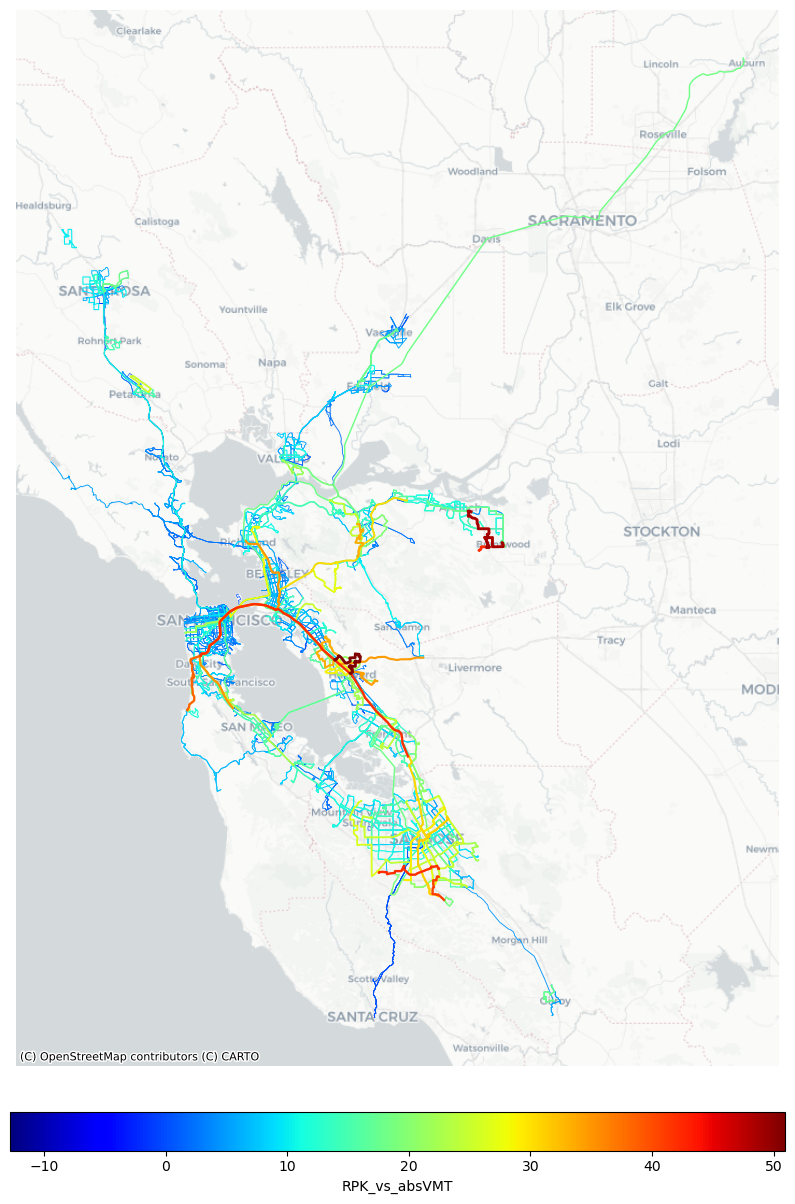

In [12]:

# Load data
case_study = 'freq_1.5_speed_1.5'
summary_final = pd.read_csv('outputs/transit_trips_aggregate_ST_summary_'+case_study+'.csv')
variable = 'RPK_vs_absVMT'
# summary_final = summary_final[(summary_final[variable] >= -11)&(summary_final[variable] <= 11)]
# summary_final = summary_final[(summary_final[variable] != 0)]


# Convert columns to proper types
summary_final['shapes_lat'] = summary_final['shapes_lat'].apply(ast.literal_eval)
summary_final['shapes_lon'] = summary_final['shapes_lon'].apply(ast.literal_eval)

# Create LineStrings and GeoDataFrame in a vectorized way
lines = [LineString(zip(lon, lat)) for lon, lat in zip(summary_final['shapes_lon'], summary_final['shapes_lat'])]
gdf = gpd.GeoDataFrame(summary_final, geometry=lines, crs="EPSG:4326")

# Filter and transform data
gdf = gdf.to_crs(epsg=3857)

# Set up colormap and normalization
colormap = plt.cm.get_cmap('jet')
norm = Normalize(vmin=gdf[variable].min(), vmax=gdf[variable].max())

# Calculate line widths
min_line_width = 0.1
max_line_width = 2
gdf['line_width'] = gdf[variable].apply(lambda x: min_line_width + (max_line_width - min_line_width) * norm(x))

# Plotting
fig, ax = plt.subplots(figsize=(10, 15))
for _, row in gdf.iterrows():
    line_color = colormap(norm(row[variable]))
    line_width = row['line_width']
    ax.plot(*row['geometry'].xy, color=line_color, linewidth=line_width)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()

# Colorbar
sm = ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
cbar.set_label(variable)

# plt.show()

plt.savefig('outputs/map_ROI.png', dpi=300, bbox_inches='tight')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import LineString
import ast
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colorbar import ColorbarBase

# Load your data
summary_final = pd.read_csv('outputs/transit_trips_aggregate_ST_freq_1.5_speed_1.5.csv')

# Convert string representations of lists back to lists
summary_final['shape_pt_lat_post'] = summary_final['shape_pt_lat_post'].apply(ast.literal_eval)
summary_final['shape_pt_lon_post'] = summary_final['shape_pt_lon_post'].apply(ast.literal_eval)

# Initialize an empty GeoDataFrame
gdf_list = []

# Loop through the data to create LineString geometries
for _, row in summary_final.iterrows():
    latitudes = row['shape_pt_lat_post']
    longitudes = row['shape_pt_lon_post']
    line = LineString(zip(longitudes, latitudes))
    gdf_list.append(gpd.GeoDataFrame({'geometry': [line], 'Frequency': [row['frequency_hour_post']]}, crs="EPSG:4326"))

# Combine all GeoDataFrames into one
gdf = pd.concat(gdf_list)

gdf = gdf[(gdf['Frequency'] >= 0) & (gdf['Frequency'] <= 6)]


# Convert to Web Mercator for compatibility with contextily basemap
gdf = gdf.to_crs(epsg=3857)

# Define a colormap
colormap = plt.cm.get_cmap('RdBu')

# Normalize frequency values for the colormap and line width
norm = Normalize(vmin=gdf['Frequency'].min(), vmax=gdf['Frequency'].max())

# Normalize the frequency values to a suitable range for line width (e.g., 0.5 to 3)
min_line_width = 0.1
max_line_width = 3
gdf['line_width'] = gdf['Frequency'].apply(lambda x: min_line_width + (max_line_width - min_line_width) * norm(x))

# Plotting
fig, ax = plt.subplots(figsize=(10, 15))
gdf.apply(lambda x: ax.plot(*x['geometry'].xy, color=colormap(norm(x['Frequency'])), linewidth=x['line_width']), axis=1)

# Add OSM basemap
ctx.add_basemap(ax)

# Set axis
ax.set_axis_off()

# Add colorbar
sm = ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
cbar.set_label('Frequency [Transit Vehicles/Hour]')

plt.show()


# **Optional, Get Shape Table**

In [3]:
######

import pandas as pd
import geopandas as gpd
import ast
from shapely.geometry import LineString, Polygon

def update_ACE_CC(summary_final):
    #Add ACE and CC
    print(len(summary_final))
    summary_final =summary_final[~summary_final['Agency_Name'].isin(['CC: County Connection','CE: Altamont Corridor Express (ACE)',
                                                                    'AY: American Canyon Transit (ACT)', 'VN: Vine Transit (Napa County)',
                                                                    'AM: Capitol Corridor'])]
    print(len(summary_final))

    shapes_ACE_CC_AM_VN_AY = pd.read_csv('inputs/shapes_CE_CC_AM_VN_AY.csv')
    
    def determine_mode(agency):
        if agency == 'CE: Altamont Corridor Express (ACE)':
            return 'Train'
        elif agency == 'CC: County Connection':
            return 'Bus'
        elif agency == 'AY: American Canyon Transit (ACT)':
            return 'Bus'
        elif agency == 'VN: Vine Transit (Napa County)':
            return 'Bus'
        elif agency == 'AM: Capitol Corridor':
            return 'Train'
        else:
            return 'Other'  # Default case

    aggregated_shapes_ACE_CC_AM_VN_AY = shapes_ACE_CC_AM_VN_AY.groupby('TRIP').agg({'LAT': list, 'LON': list, 'AGENCY': 'first'}).reset_index()
    
    agency_name_dict2= {
        'County Connection (Central Contra Costa Transit Authority)': 'CC: County Connection',
        'ACE Altamont Corridor Express': 'CE: Altamont Corridor Express (ACE)',
        'American Canyon Transit': 'AY: American Canyon Transit (ACT)',
        'Vine Transit (Napa County)': 'VN: Vine Transit (Napa County)',
        'Capitol Corridor': 'AM: Capitol Corridor',
            }
    
    aggregated_shapes_ACE_CC_AM_VN_AY['AGENCY'] = aggregated_shapes_ACE_CC_AM_VN_AY['AGENCY'].map(agency_name_dict2)
    aggregated_shapes_ACE_CC_AM_VN_AY['Mode'] = aggregated_shapes_ACE_CC_AM_VN_AY['AGENCY'].apply(determine_mode)
    aggregated_shapes_ACE_CC_AM_VN_AY.rename(columns={'AGENCY': 'Agency_Name'}, inplace=True)
    aggregated_shapes_ACE_CC_AM_VN_AY.rename(columns={'LAT': 'shape_pt_lat_pre'}, inplace=True)
    aggregated_shapes_ACE_CC_AM_VN_AY.rename(columns={'LON': 'shape_pt_lon_pre'}, inplace=True)
    aggregated_shapes_ACE_CC_AM_VN_AY.drop(columns=('TRIP'), inplace=True)
    
    # print(summary_final)
    # print(aggregated_shapes_ACE_CC)
    print(len(summary_final))
    summary_final = pd.concat([summary_final, aggregated_shapes_ACE_CC_AM_VN_AY], ignore_index=True)


    print(len(summary_final))
    summary_final = summary_final.drop_duplicates(subset=['shape_pt_lat_pre'])
    print(len(summary_final))
    return summary_final

summary_final = pd.read_csv('outputs/transit_trips_aggregate_ST_freq_1.5_speed_1.5.csv')
summary_final =summary_final[['shape_pt_lat_pre','shape_pt_lon_pre', 'Agency_Name', 'Mode']]
# summary_final = update_ACE_CC(summary_final)
summary_final['shape_pt_lat_pre'] = summary_final['shape_pt_lat_pre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
summary_final['shape_pt_lon_pre'] = summary_final['shape_pt_lon_pre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
summary_final['Category_Mode'] = summary_final['Agency_Name'] + " - " + summary_final['Mode']
geometry = summary_final.apply(lambda row: LineString(zip(row['shape_pt_lon_pre'], row['shape_pt_lat_pre'])), axis=1)
summary_final = gpd.GeoDataFrame(summary_final, geometry=geometry)
columns_to_remove = ['shape_pt_lat_pre', 'shape_pt_lon_pre']  # Update this with your actual column names
summary_final = summary_final.drop(columns=columns_to_remove)
summary_final.to_file('outputs/allGTFS_shapefile.shp')



/opt/conda/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_1251612/814877758.py:4: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).


In [4]:
pd.read_csv('outputs/transit_trips_aggregate_ST_freq_1.5_speed_1.5.csv').Agency_Name.value_counts()

AC: Alameda-Contra Costa Transit (AC Transit)                299
SF: San Francisco Municipal Transportation Agency (SFMTA)    204
VT: Santa Clara Valley Transportation Authority (VTA)        174
ST: SamTrans                                                 169
SO: Sonoma County Transit                                    116
CC: County Connection                                        112
SC: Santa Cruz Metro                                          98
GG: Golden Gate Transit                                       72
MA: Marin Transit                                             63
WH: Livermore Amador Valley Transit Authority (LAVTA)         34
FF: Fairfield and Suisun Transit (FAST)                       32
SL: SolTrans                                                  31
WC: Western Contra Costa Transit Authority (WestCAT)          29
TD: Tri Delta Transit                                         28
SM: Stanford Marguerite Shuttle                               25
CM: San Mateo Commute.org